#### __All descriptions of variables are available on:__
https://opendatanetwork.herokuapp.com/dataset/data.seattle.gov/2bpz-gwpy 

# Prepare environment and data

In [1]:
# These are my default settings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# from pandas_profiling import ProfileReport
# import pandas_profiling as pdp

plt.rcParams["figure.figsize"] = (10, 5)
plt.style.use("seaborn")

pd.set_option("display.max_columns", None)


In [2]:
import pandas as pd
import numpy as np

origin_data = pd.read_csv("2016-building-energy-benchmarking.csv", sep=",",decimal='.')
# data.head()

In [3]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

# Understanding data and Data cleaning

In [4]:
df = origin_data.copy()

In [5]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [6]:
df.shape

(3376, 46)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

<Axes: >

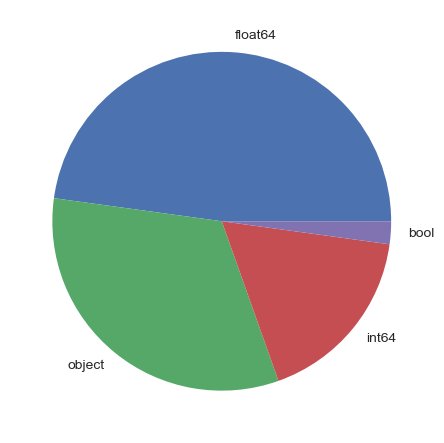

In [8]:
df.dtypes.value_counts().plot.pie()

In [9]:
int_col = df.select_dtypes("int64").columns
df[int_col] = df[int_col].astype(float)

<Axes: >

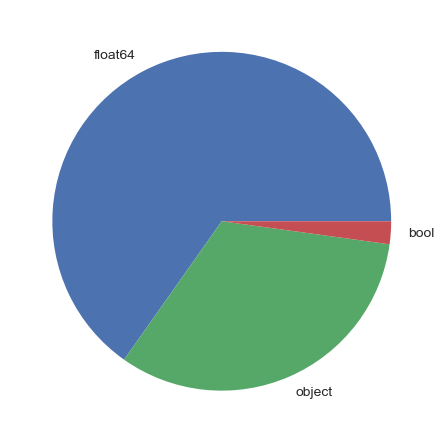

In [10]:
df.dtypes.value_counts().plot.pie()

In [11]:
# creation building age column
df["age"] = 2016-df["YearBuilt"]
# Focus on 'NonResidential'
keywords =['NonResidential', 'Nonresidential COS','Nonresidential WA','Campus']
df = df[df['BuildingType'].str.contains('|'.join(keywords))]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 0 to 3375
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1570 non-null   float64
 1   DataYear                         1570 non-null   float64
 2   BuildingType                     1570 non-null   object 
 3   PrimaryPropertyType              1570 non-null   object 
 4   PropertyName                     1570 non-null   object 
 5   Address                          1570 non-null   object 
 6   City                             1570 non-null   object 
 7   State                            1570 non-null   object 
 8   ZipCode                          1554 non-null   float64
 9   TaxParcelIdentificationNumber    1570 non-null   object 
 10  CouncilDistrictCode              1570 non-null   float64
 11  Neighborhood                     1570 non-null   object 
 12  Latitude            

In [20]:
df[df["NumberofBuildings"]==0][["PrimaryPropertyType","PropertyName","NumberofFloors"]]

,PrimaryPropertyType,PropertyName,NumberofFloors
63,Medical Office,Polyclinic North && South,3.0
76,Small- and Mid-Sized Office,KCTS9,2.0
160,Warehouse,Harbor Island: Warehouse E - DNRP-SWD,4.0
201,Large Office,Cox Media Group Seattle KIRO TV (322),3.0
241,Small- and Mid-Sized Office,University District Office Buiding,5.0
264,Mixed Use Property,Thaw Building,1.0
278,Large Office,Fourth and Pike Building,10.0
280,Hotel,Motif Seattle,19.0
291,Other,Meridian (East),4.0
358,Other,Westbridge,1.0


In [21]:
# df["NumberofBuildings"].unique()
# NumberofBuildings contains NaN and 0. replace to 1

df["NumberofBuildings"].fillna(0, inplace=True)
df["NumberofBuildings"].replace(0,1, inplace=True)
df["NumberofBuildings"].unique()

# University of Wa has 111 buildings so that we may can remove it. may be contained in Outliers.
# df[df["NumberofBuildings"]>10

array([  1.,   3.,   2.,   4.,  27.,   6.,  11.,  14.,   9.,   5.,   7.,
         8.,  23.,  10., 111.])

In [22]:
# df["NumberofFloors"].unique()
# NumberofFloors contains 0. replace to 1
df["NumberofFloors"].replace(0,1, inplace=True)

df["NumberofFloors"].unique()

array([12., 11., 41., 10., 18.,  2.,  8., 15., 25.,  9., 33.,  6., 28.,
        5., 19.,  7.,  3.,  4., 24., 20., 34.,  1., 16., 23., 17., 36.,
       22., 47., 29., 14., 49., 37., 42., 63., 13., 21., 55., 46., 30.,
       56., 76., 27., 99., 39.])

In [23]:
# verify NaNs
# plt.figure(figsize=(18,10))
# sns.heatmap(df.isna(), cbar=False)

In [24]:
# NaN rate
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Comments                           1.000000
Outlier                            0.989809
YearsENERGYSTARCertified           0.942038
ThirdLargestPropertyUseTypeGFA     0.775796
ThirdLargestPropertyUseType        0.775796
SecondLargestPropertyUseTypeGFA    0.456688
SecondLargestPropertyUseType       0.456688
ENERGYSTARScore                    0.356051
ZipCode                            0.010191
LargestPropertyUseTypeGFA          0.003822
LargestPropertyUseType             0.003822
SiteEUIWN(kBtu/sf)                 0.001911
SiteEnergyUseWN(kBtu)              0.001911
SiteEUI(kBtu/sf)                   0.001911
SourceEUI(kBtu/sf)                 0.001274
GHGEmissionsIntensity              0.001274
TotalGHGEmissions                  0.001274
ListOfAllPropertyUseTypes          0.001274
SteamUse(kBtu)                     0.001274
SourceEUIWN(kBtu/sf)               0.001274
SiteEnergyUse(kBtu)                0.001274
Electricity(kWh)                   0.001274
Electricity(kBtu)               

In [25]:
# Comments contains no value 
# df.Comments.unique()

# creation the list of removal columns

rem_col = []
rem_col.extend(["Comments", "City", "YearBuilt", "State", "Address", "DataYear", "TaxParcelIdentificationNumber", \
               "OSEBuildingID", "ListOfAllPropertyUseTypes", "ZipCode"])
rem_col

['Comments',
 'City',
 'YearBuilt',
 'State',
 'Address',
 'DataYear',
 'TaxParcelIdentificationNumber',
 'OSEBuildingID',
 'ListOfAllPropertyUseTypes',
 'ZipCode']

In [26]:
# creation the list of removal index
rem_id =[]

In [27]:
# extraction outier data
outlier_col =df["Outlier"].notna()
outlier = df[outlier_col]

# mean of electricity consumption of non outlier data
non_outlier = df[~outlier_col]
non_out_elec = non_outlier["Electricity(kBtu)"].mean().astype(int)

# mean of electricity consumption of high outlier data
h_out = outlier[outlier["Outlier"]=="High outlier"]
h_out_elec = h_out["Electricity(kBtu)"].mean().astype(int)

# mean of electricity consumption of low outlier data
l_out = outlier[outlier["Outlier"]=="Low outlier"]
l_out_elec = l_out["Electricity(kBtu)"].mean().astype(int)

print("Difference of  electricity consumption\nHigh Outlier: {0}\nNon Outlier : {1}\nLow Outlier :  {2}".format(h_out_elec, non_out_elec, l_out_elec))

Difference of  electricity consumption
High Outlier: 33465927
Non Outlier : 6109271
Low Outlier :  233987


We can observe big difference of consumption. Outliers can be removed. 

In [28]:
rem_id.extend(outlier.index.to_list())
rem_id

[226,
 384,
 448,
 517,
 1045,
 1229,
 1295,
 1611,
 1945,
 2129,
 2189,
 2216,
 2410,
 2450,
 2801,
 3152]

In [21]:
# Verify to check if all points in seattle ====> verified.


import folium

# Create a map centered  Seattle's coordinates
m = folium.Map(location=[47.6062, -122.3321], zoom_start=11)

# Add a dot for each latitude and longitude point
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,  # defines circle marker in pixels
        color='red',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Display the map
m


In [29]:
df[df.DefaultData == True]
rem_id.extend(df[df.DefaultData == True].index.tolist())

In [30]:
df[df["ComplianceStatus"] == "Missing Data"] #.index.tolist()
rem_id.extend(df[df["ComplianceStatus"] == "Missing Data"].index.tolist())

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 0 to 3375
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1570 non-null   float64
 1   DataYear                         1570 non-null   float64
 2   BuildingType                     1570 non-null   object 
 3   PrimaryPropertyType              1570 non-null   object 
 4   PropertyName                     1570 non-null   object 
 5   Address                          1570 non-null   object 
 6   City                             1570 non-null   object 
 7   State                            1570 non-null   object 
 8   ZipCode                          1554 non-null   float64
 9   TaxParcelIdentificationNumber    1570 non-null   object 
 10  CouncilDistrictCode              1570 non-null   float64
 11  Neighborhood                     1570 non-null   object 
 12  Latitude            

In [32]:
rem_col.extend(["CouncilDistrictCode","Outlier","GHGEmissionsIntensity","DefaultData","NaturalGas(therms)","Electricity(kWh)",\
                "SiteEnergyUseWN(kBtu)","SourceEUIWN(kBtu/sf)","SourceEUI(kBtu/sf)","SiteEUIWN(kBtu/sf)","SiteEUI(kBtu/sf)",\
               "YearsENERGYSTARCertified","ENERGYSTARScore"])

In [33]:
# I keep ENERGYSTARScore
ENERGYSTARScore = df["ENERGYSTARScore"]

In [34]:
df[df["LargestPropertyUseType"].isna()]
rem_id.extend(df[df["LargestPropertyUseType"].isna()].index.tolist())

In [35]:
# Transform list no usage informations
nodata_uset_col = ["LargestPropertyUseType","SecondLargestPropertyUseType","ThirdLargestPropertyUseType"]

# Transform no GFA informations to 0
nodata_gfa_col = ["LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA"]

In [36]:
def factor_transformer(df, col_rm=None, row_rm=None, cat_data_tf=None, fill_0=None):
    if col_rm:
        df = df.drop(columns=col_rm)

    if row_rm:
        df = df.drop(row_rm)
        
    if cat_data_tf:
        df[cat_data_tf] = df[cat_data_tf].fillna("NoData")
    
    if fill_0:
        df[fill_0] = df[fill_0].fillna(0)

    return df


cleaned_data = factor_transformer(df, col_rm=rem_col, row_rm=rem_id, cat_data_tf=nodata_uset_col, fill_0=nodata_gfa_col)
cleaned_data


,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,age
0,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,Hotel,88434.0,NoData,0.0,NoData,0.0,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,Compliant,249.98,89.0
1,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,8.387933e+06,0.00,3.242851e+06,5.145082e+06,Compliant,295.86,20.0
2,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1.0,41.0,956110.0,196718.0,759392.0,Hotel,756493.0,NoData,0.0,NoData,0.0,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,Compliant,2089.28,47.0
3,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,Hotel,61320.0,NoData,0.0,NoData,0.0,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,Compliant,286.43,90.0
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,1.417261e+07,0.00,5.368607e+06,8.803998e+06,Compliant,505.01,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,Nonresidential COS,Other,High Point Community Center,DELRIDGE NEIGHBORHOODS,47.54067,-122.37441,1.0,1.0,18261.0,0.0,18261.0,Other - Recreation,18261.0,NoData,0.0,NoData,0.0,9.320821e+05,0.00,6.323620e+05,2.997200e+05,Compliant,20.33,34.0
3372,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,47.59625,-122.32283,1.0,1.0,16000.0,0.0,16000.0,Other - Recreation,16000.0,NoData,0.0,NoData,0.0,9.502762e+05,0.00,3.965461e+05,5.537300e+05,Compliant,32.17,12.0
3373,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,1.0,13157.0,0.0,13157.0,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,5.765898e+06,0.00,1.792159e+06,3.973739e+06,Compliant,223.54,42.0
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,GREATER DUWAMISH,47.52832,-122.32431,1.0,1.0,14101.0,0.0,14101.0,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,7.194712e+05,0.00,3.488702e+05,3.706010e+05,Compliant,22.11,27.0


In [37]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1535 non-null   object 
 1   PrimaryPropertyType              1535 non-null   object 
 2   PropertyName                     1535 non-null   object 
 3   Neighborhood                     1535 non-null   object 
 4   Latitude                         1535 non-null   float64
 5   Longitude                        1535 non-null   float64
 6   NumberofBuildings                1535 non-null   float64
 7   NumberofFloors                   1535 non-null   float64
 8   PropertyGFATotal                 1535 non-null   float64
 9   PropertyGFAParking               1535 non-null   float64
 10  PropertyGFABuilding(s)           1535 non-null   float64
 11  LargestPropertyUseType           1535 non-null   object 
 12  LargestPropertyUseTy

:::info note
Now we don't have any missing data, good to go

In [32]:
cleaned_data.select_dtypes("float64").min()

Latitude                               47.50959
Longitude                            -122.41182
NumberofBuildings                       1.00000
NumberofFloors                          1.00000
PropertyGFATotal                    11285.00000
PropertyGFAParking                      0.00000
PropertyGFABuilding(s)               3636.00000
LargestPropertyUseTypeGFA            5656.00000
SecondLargestPropertyUseTypeGFA         0.00000
ThirdLargestPropertyUseTypeGFA          0.00000
ENERGYSTARScore                         1.00000
SiteEnergyUse(kBtu)                     0.00000
SteamUse(kBtu)                          0.00000
Electricity(kBtu)                 -115417.00000
NaturalGas(kBtu)                        0.00000
TotalGHGEmissions                      -0.80000
age                                     1.00000
dtype: float64

# Pre-model analysis and pre-processing

In [38]:
data = cleaned_data.copy()

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1535 non-null   object 
 1   PrimaryPropertyType              1535 non-null   object 
 2   PropertyName                     1535 non-null   object 
 3   Neighborhood                     1535 non-null   object 
 4   Latitude                         1535 non-null   float64
 5   Longitude                        1535 non-null   float64
 6   NumberofBuildings                1535 non-null   float64
 7   NumberofFloors                   1535 non-null   float64
 8   PropertyGFATotal                 1535 non-null   float64
 9   PropertyGFAParking               1535 non-null   float64
 10  PropertyGFABuilding(s)           1535 non-null   float64
 11  LargestPropertyUseType           1535 non-null   object 
 12  LargestPropertyUseTy

In [40]:
object_cols = data.select_dtypes("object").columns

for col in object_cols:
    data[col] = data[col].str.lower()
data.head()

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,age
0,nonresidential,hotel,mayflower park hotel,downtown,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,hotel,88434.0,nodata,0.0,nodata,0.0,7226362.5,2003882.00,3946027.0,1276453.0,compliant,249.98,89.0
1,nonresidential,hotel,paramount hotel,downtown,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,hotel,83880.0,parking,15064.0,restaurant,4622.0,8387933.0,0.00,3242851.0,5145082.0,compliant,295.86,20.0
2,nonresidential,hotel,5673-the westin seattle,downtown,47.61393,-122.33810,1.0,41.0,956110.0,196718.0,759392.0,hotel,756493.0,nodata,0.0,nodata,0.0,72587024.0,21566554.00,49526664.0,1493800.0,compliant,2089.28,47.0
3,nonresidential,hotel,hotel max,downtown,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,hotel,61320.0,nodata,0.0,nodata,0.0,6794584.0,2214446.25,2768924.0,1811213.0,compliant,286.43,90.0
4,nonresidential,hotel,warwick seattle hotel (id8),downtown,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,hotel,123445.0,parking,68009.0,swimming pool,0.0,14172606.0,0.00,5368607.0,8803998.0,compliant,505.01,36.0


<Axes: >

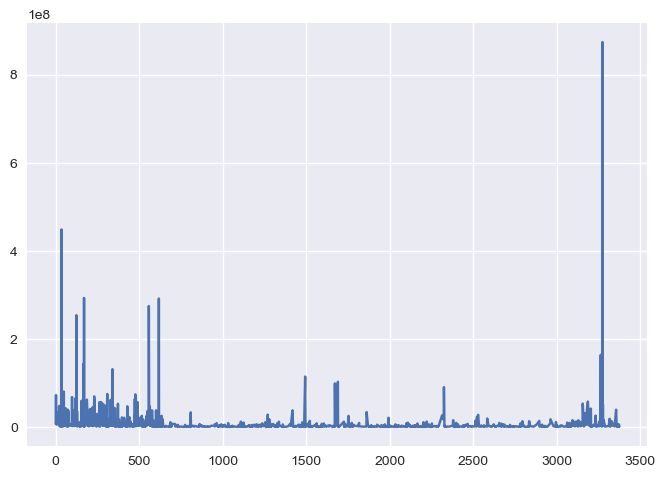

In [41]:
data["SiteEnergyUse(kBtu)"].plot()

In [42]:
# remove outlier
data = data[data["SiteEnergyUse(kBtu)"]<8e8]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1534 non-null   object 
 1   PrimaryPropertyType              1534 non-null   object 
 2   PropertyName                     1534 non-null   object 
 3   Neighborhood                     1534 non-null   object 
 4   Latitude                         1534 non-null   float64
 5   Longitude                        1534 non-null   float64
 6   NumberofBuildings                1534 non-null   float64
 7   NumberofFloors                   1534 non-null   float64
 8   PropertyGFATotal                 1534 non-null   float64
 9   PropertyGFAParking               1534 non-null   float64
 10  PropertyGFABuilding(s)           1534 non-null   float64
 11  LargestPropertyUseType           1534 non-null   object 
 12  LargestPropertyUseTy

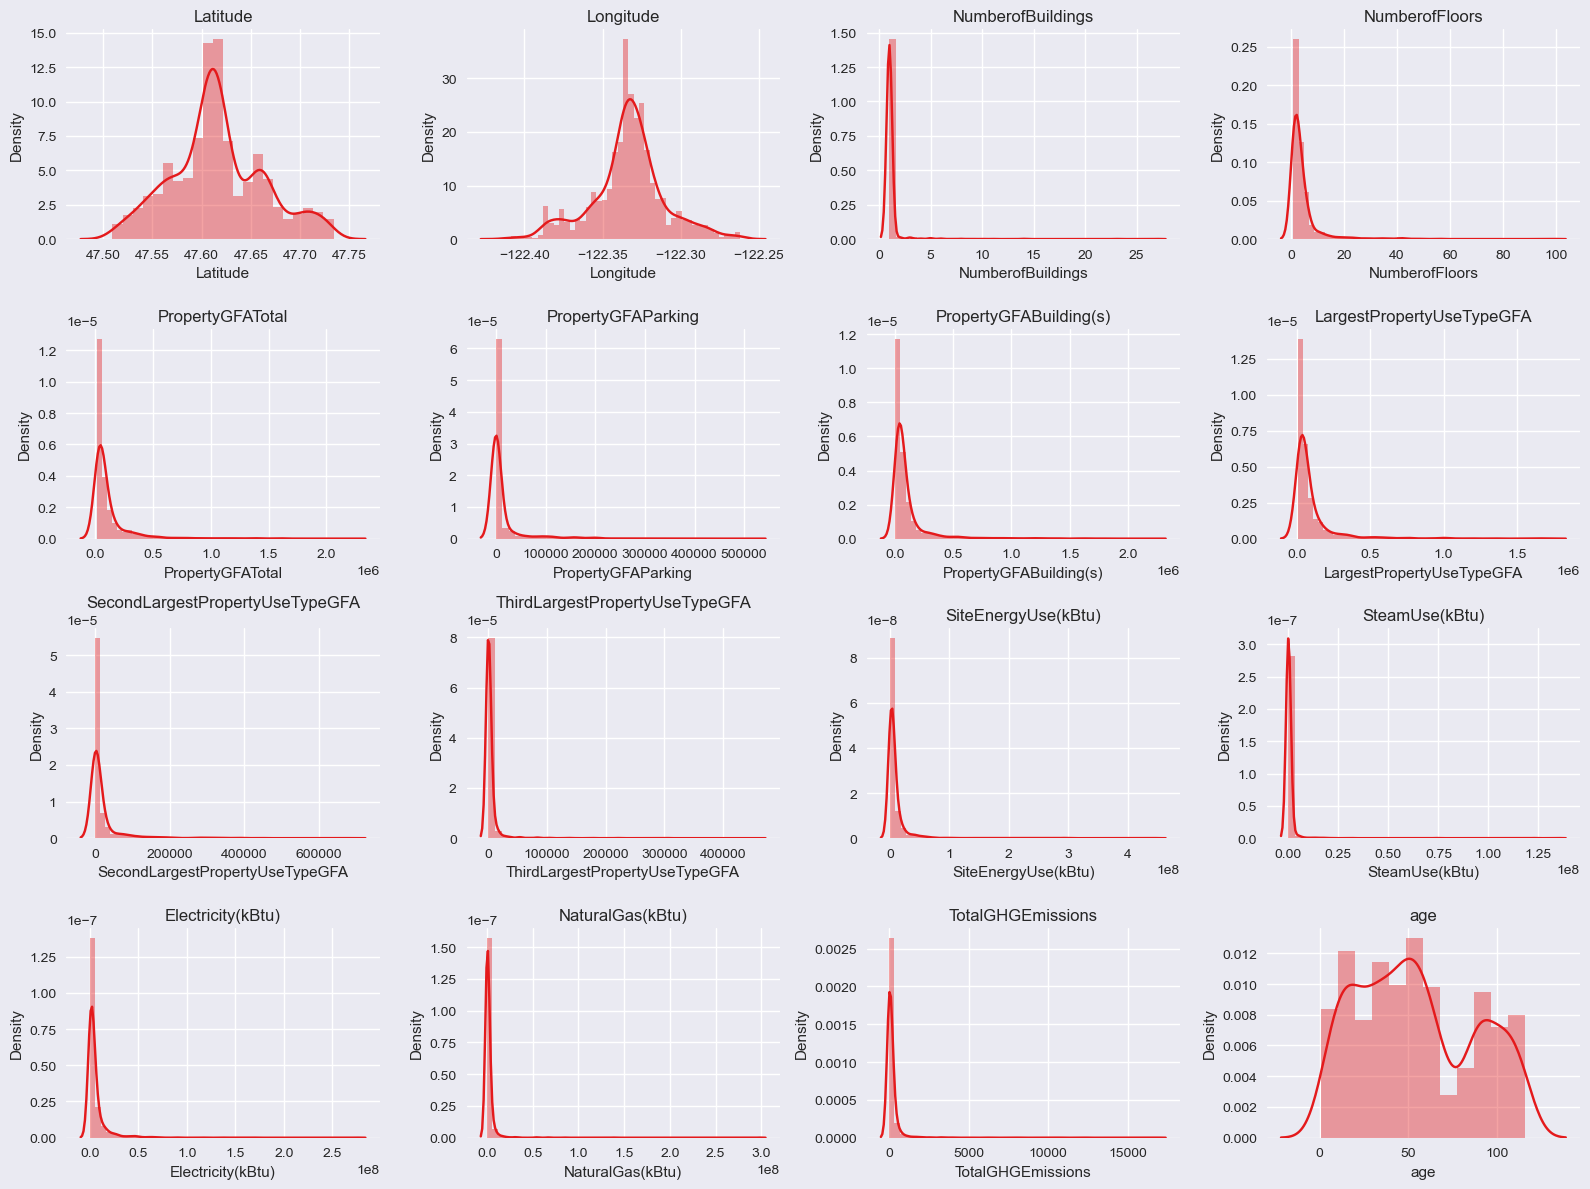

In [43]:

plt.figure(figsize=(16, 12), facecolor="#eaeaf2")

sns.set_palette("Set1")
for i, col_hist in enumerate(data.select_dtypes("float64")):
    plt.subplot(4, 4, i+1)
    sns.distplot(data[col_hist])
    plt.title(col_hist)

plt.tight_layout()
plt.show()

In [74]:
data["PrimaryPropertyType"].unique().tolist()

['hotel',
 'other',
 'mixed use property',
 'university',
 'small- and mid-sized office',
 'self-storage facility',
 'warehouse',
 'k-12 school',
 'large office',
 'senior care community',
 'medical office',
 'retail store',
 'hospital',
 'residence hall',
 'distribution center',
 'worship facility',
 'supermarket / grocery store',
 'laboratory',
 'refrigerated warehouse',
 'restaurant',
 'low-rise multifamily']

In [90]:
pd.options.display.float_format = '{:.2f}'.format

df_compare = data[["PrimaryPropertyType","SiteEnergyUse(kBtu)","TotalGHGEmissions"]].groupby("PrimaryPropertyType").agg(["count","min","max",sum,"mean","std"])
df_compare                           #[data["PrimaryPropertyType"].str.contains("office")]

SiteEnergyUse(kBtu)                          \
                                          count        min          max   
PrimaryPropertyType                                                       
distribution center                          53  150167.80  21795830.00   
hospital                                     10 2037720.62 293090784.00   
hotel                                        74  716279.69  80469216.00   
k-12 school                                  42  805643.50   6994740.50   
laboratory                                   10 7251589.00  53166156.00   
large office                                169 1363191.62  92937640.00   
low-rise multifamily                          2 1997181.50   3778355.00   
medical office                               39  817409.62 102673696.00   
mixed use property                          113  229856.41 448385312.00   
other                                       244       0.00 274682208.00   
refrigerated warehouse                       12  642645.19  17695420.00   
residence hall                               21  605130.69  15965859.00   
restaurant                                   11 1358519.00  11508035.00   
retail store                                 85  162960.00  40062888.00   
self-storage facility                        27   57133.20   2158629.00   
senior care community                        20 1076733.25  42792072.00   
small- and mid-sized office                 285  342726.09  37951708.00   
supermarket / grocery store                  40 1906384.88  16865978.00   
university                                   23  323739.41 114648520.00   
warehouse                                   185   79711.80  44731160.00   
worship facility                             69  216115.00   5587347.00   

                                                                     \
                                      sum         mean          std   
PrimaryPropertyType                                                   
distribution center          127484097.63   2405360.33   3794992.22   
hospital                    1415469944.62 141546994.46 106489233.16   
hotel                        903960850.44  12215687.17  15875627.02   
k-12 school                   99480349.06   2368579.74   1527165.75   
laboratory                   262931276.00  26293127.60  15768189.16   
large office                2960018366.38  17514901.58  15437806.98   
low-rise multifamily           5775536.50   2887768.25   1259479.86   
medical office               466894686.75  11971658.63  17151727.49   
mixed use property          1359391753.13  12030015.51  43724112.38   
other                       2240095821.32   9180720.58  22012427.36   
refrigerated warehouse        44633136.94   3719428.08   5106498.90   
residence hall                80025173.44   3810722.54   3576453.44   
restaurant                    62266852.50   5660622.95   3095623.33   
retail store                 421725080.78   4961471.54   6385957.70   
self-storage facility         20403359.61    755679.99    488245.14   
senior care community        230345766.50  11517288.32  11263983.79   
small- and mid-sized office  757952481.66   2659482.39   2854560.62   
supermarket / grocery store  403914822.38  10097870.56   3379821.71   
university                   451022009.44  19609652.58  30148521.66   
warehouse                    365751349.73   1977034.32   3707227.95   
worship facility              82999845.44   1202896.31    965132.05   

                            TotalGHGEmissions                                  \
                                        count   min      max      sum    mean   
PrimaryPropertyType                                                             
distribution center                        53  1.06   455.39  2661.96   50.23   
hospital                                   10 14.21 12307.16 50529.63 5052.96   
hotel                                      74  4.99  2573.75 29107.76  393.35   
k-12 school                         

<Axes: xlabel='PrimaryPropertyType'>

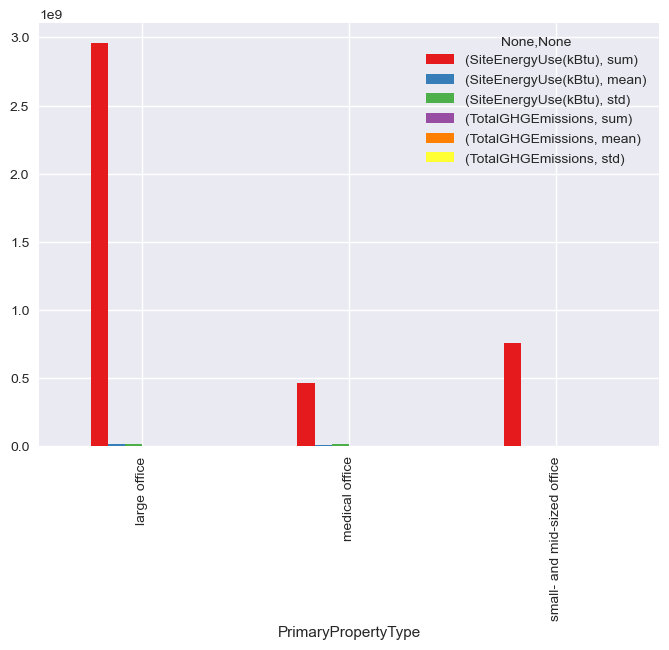

In [83]:
df_compare.plot.bar()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

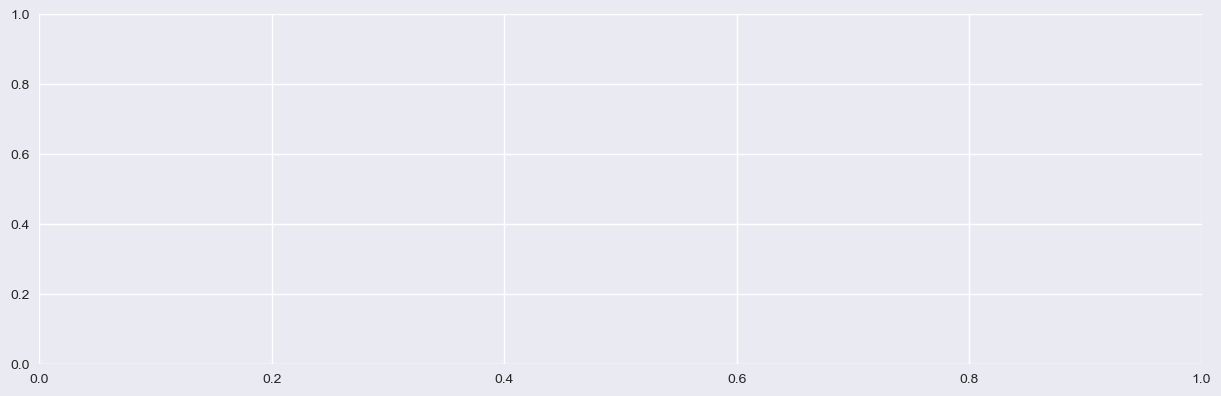

In [81]:
plt.figure(figsize=(15, 10), facecolor="#eaeaf2")

plt.subplot(2, 1, 1)
sns.barplot(data=df_compare, y="SiteEnergyUse(kBtu)", x=df_compare.index)
plt.title("SiteEnergyUse(kBtu)")

plt.subplot(2, 1, 2)
sns.barplot(data=df_compare, y="TotalGHGEmissions", x=df_compare.index)
plt.title("TotalGHGEmissions")

# plt.tight_layout()
plt.show()

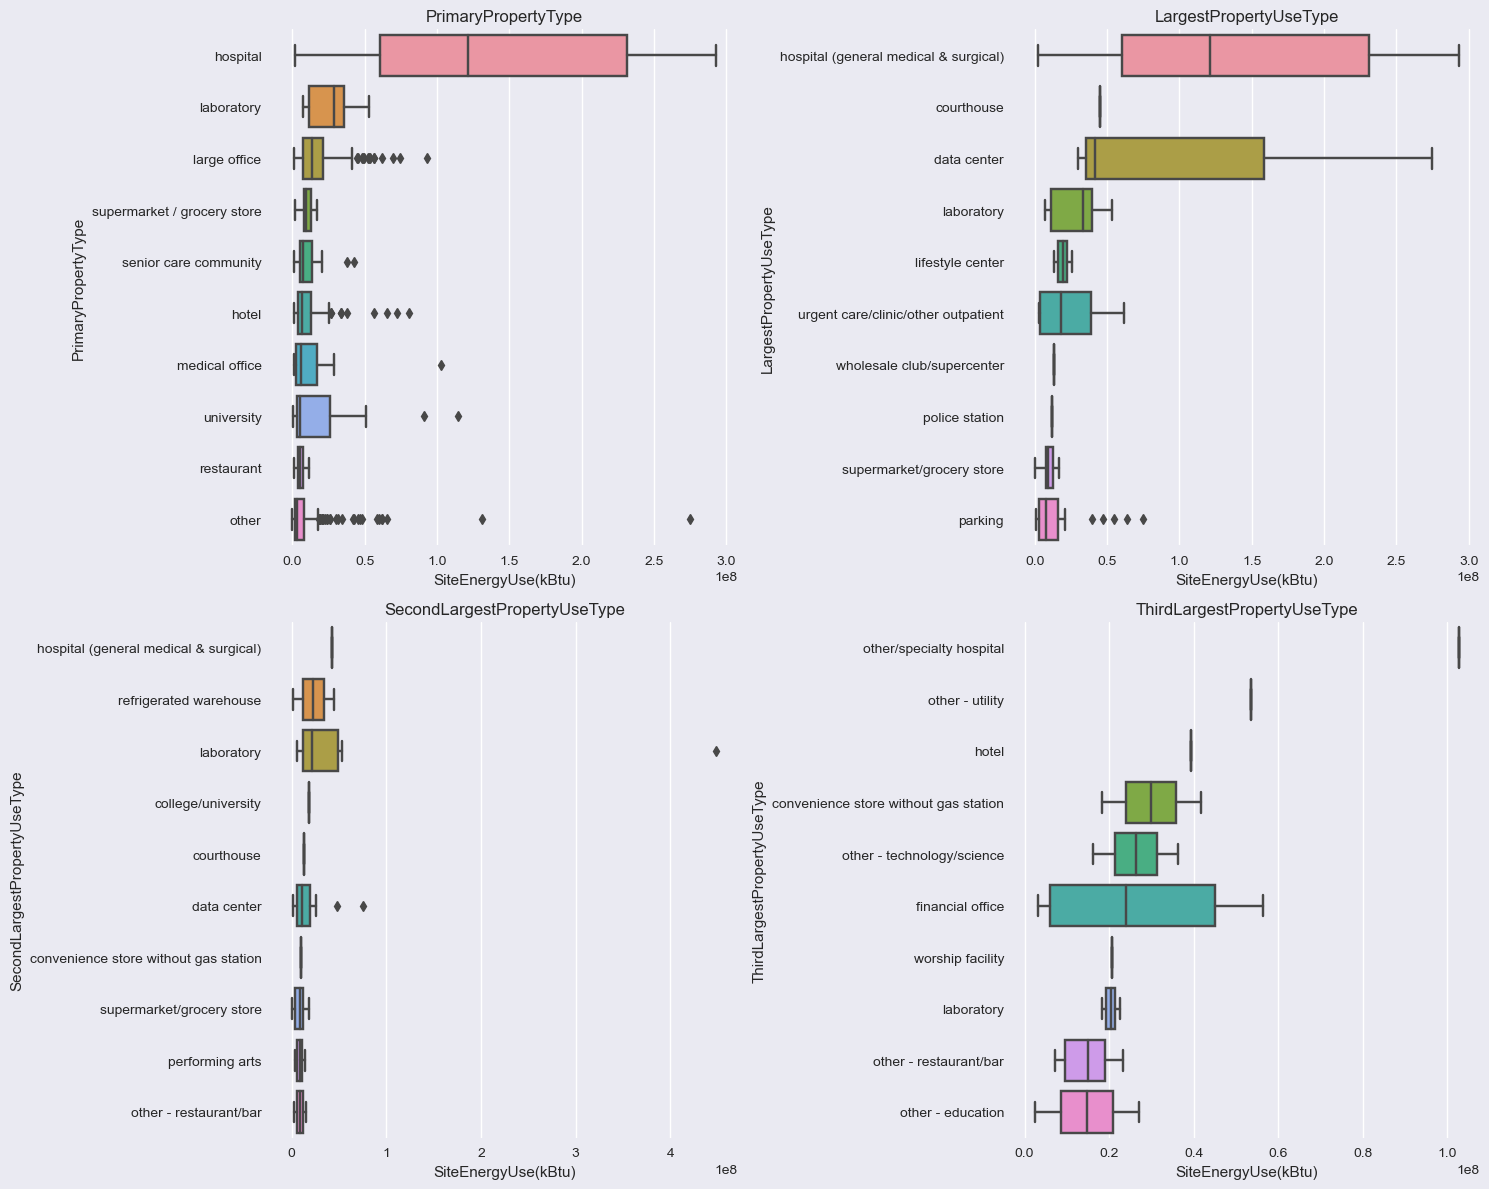

In [89]:
plt.figure(figsize=(15, 12), facecolor="#eaeaf2")

# Boxplot of Primary Property Type
plt.subplot(2, 2, 1)
prime_use_top10 = data.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].median().sort_values(ascending=False).index[:10]
sns.boxplot(data=data, y="PrimaryPropertyType", x="SiteEnergyUse(kBtu)", order=prime_use_top10)
plt.title("PrimaryPropertyType")

# Largest Property Type
plt.subplot(2, 2, 2)
prime_use_top10 = data.groupby("LargestPropertyUseType")["SiteEnergyUse(kBtu)"].median().sort_values(ascending=False).index[:10]
sns.boxplot(data=data, y="LargestPropertyUseType", x="SiteEnergyUse(kBtu)", order=prime_use_top10)
plt.title("LargestPropertyUseType")

# 2nd Largest Property Type
plt.subplot(2, 2, 3)
prime_use_top10 = data.groupby("SecondLargestPropertyUseType")["SiteEnergyUse(kBtu)"].median().sort_values(ascending=False).index[:10]
sns.boxplot(data=data, y="SecondLargestPropertyUseType", x="SiteEnergyUse(kBtu)", order=prime_use_top10)
plt.title("SecondLargestPropertyUseType")

# 3rd Largest Property Type
plt.subplot(2, 2, 4)
prime_use_top10 = data.groupby("ThirdLargestPropertyUseType")["SiteEnergyUse(kBtu)"].median().sort_values(ascending=False).index[:10]
sns.boxplot(data=data, y="ThirdLargestPropertyUseType", x="SiteEnergyUse(kBtu)", order=prime_use_top10)
plt.title("ThirdLargestPropertyUseType")

plt.tight_layout()
plt.show()

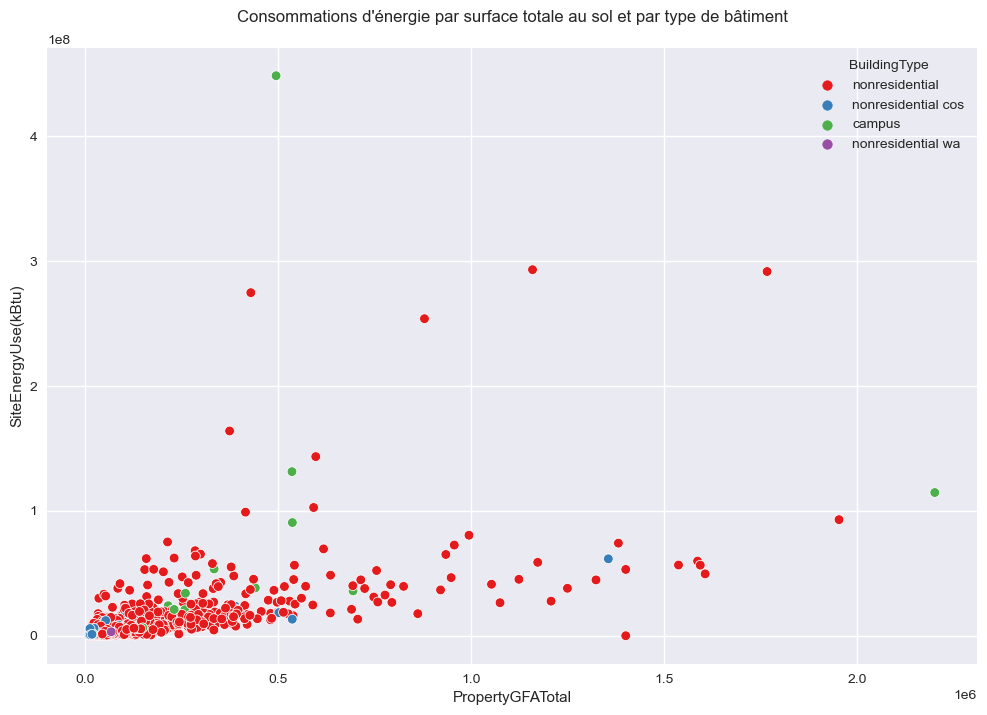

In [110]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', hue='BuildingType')
plt.title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n")
plt.show()

Latitude                               47.50959
Longitude                            -122.41182
NumberofBuildings                       1.00000
NumberofFloors                          1.00000
PropertyGFATotal                    11285.00000
PropertyGFAParking                      0.00000
PropertyGFABuilding(s)               3636.00000
LargestPropertyUseTypeGFA            5656.00000
SecondLargestPropertyUseTypeGFA         0.00000
ThirdLargestPropertyUseTypeGFA          0.00000
SiteEnergyUse(kBtu)                     0.00000
SteamUse(kBtu)                          0.00000
Electricity(kBtu)                 -115417.00000
NaturalGas(kBtu)                        0.00000
TotalGHGEmissions                      -0.80000
age                                     1.00000
dtype: float64

# Preproces

In [111]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Neighborhood',
       'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions', 'age'],
      dtype='object')

In [113]:
df1 = data[[
    'BuildingType',
            'PrimaryPropertyType',
            'PropertyName',
            'Neighborhood',
            'Latitude', 
            'Longitude', 
            'NumberofBuildings', 
            'NumberofFloors',
            'PropertyGFATotal',
            'PropertyGFAParking',
            'PropertyGFABuilding(s)',
            'LargestPropertyUseType', 
            'LargestPropertyUseTypeGFA',
            'SecondLargestPropertyUseType',
            'SecondLargestPropertyUseTypeGFA',
            'ThirdLargestPropertyUseType',
            'ThirdLargestPropertyUseTypeGFA',
            'SiteEnergyUse(kBtu)', 
            'SteamUse(kBtu)', 
            'Electricity(kBtu)',
            'NaturalGas(kBtu)', 
            'ComplianceStatus',
            'TotalGHGEmissions',
            'age'
           ]].copy()


Y = data[["TotalGHGEmissions",""]]

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,age
0,nonresidential,hotel,mayflower park hotel,downtown,47.61220,-122.33799,1.0,12.0,88434.0,0.0,88434.0,hotel,88434.0,nodata,0.0,nodata,0.0,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06,compliant,249.98,89.0
1,nonresidential,hotel,paramount hotel,downtown,47.61317,-122.33393,1.0,11.0,103566.0,15064.0,88502.0,hotel,83880.0,parking,15064.0,restaurant,4622.0,8.387933e+06,0.00,3.242851e+06,5.145082e+06,compliant,295.86,20.0
2,nonresidential,hotel,5673-the westin seattle,downtown,47.61393,-122.33810,1.0,41.0,956110.0,196718.0,759392.0,hotel,756493.0,nodata,0.0,nodata,0.0,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06,compliant,2089.28,47.0
3,nonresidential,hotel,hotel max,downtown,47.61412,-122.33664,1.0,10.0,61320.0,0.0,61320.0,hotel,61320.0,nodata,0.0,nodata,0.0,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06,compliant,286.43,90.0
4,nonresidential,hotel,warwick seattle hotel (id8),downtown,47.61375,-122.34047,1.0,18.0,175580.0,62000.0,113580.0,hotel,123445.0,parking,68009.0,swimming pool,0.0,1.417261e+07,0.00,5.368607e+06,8.803998e+06,compliant,505.01,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,nonresidential cos,other,high point community center,delridge neighborhoods,47.54067,-122.37441,1.0,1.0,18261.0,0.0,18261.0,other - recreation,18261.0,nodata,0.0,nodata,0.0,9.320821e+05,0.00,6.323620e+05,2.997200e+05,compliant,20.33,34.0
3372,nonresidential cos,other,international district/chinatown cc,downtown,47.59625,-122.32283,1.0,1.0,16000.0,0.0,16000.0,other - recreation,16000.0,nodata,0.0,nodata,0.0,9.502762e+05,0.00,3.965461e+05,5.537300e+05,compliant,32.17,12.0
3373,nonresidential cos,other,queen anne pool,magnolia / queen anne,47.63644,-122.35784,1.0,1.0,13157.0,0.0,13157.0,other - recreation,7583.0,fitness center/health club/gym,5574.0,swimming pool,0.0,5.765898e+06,0.00,1.792159e+06,3.973739e+06,compliant,223.54,42.0
3374,nonresidential cos,mixed use property,south park community center,greater duwamish,47.52832,-122.32431,1.0,1.0,14101.0,0.0,14101.0,other - recreation,6601.0,fitness center/health club/gym,6501.0,pre-school/daycare,484.0,7.194712e+05,0.00,3.488702e+05,3.706010e+05,compliant,22.11,27.0


In [ ]:
data["Neighborhood"].describe()

In [ ]:
data["ZipCode"].astype(object).describe()

In [ ]:
data.LargestPropertyUseType.unique()

In [ ]:
df2.info()

In [ ]:
top10 = list(order_list_top10)
top10
get_dum_a = df2[df2.LargestPropertyUseType.str.contains("|".join(top10))]
# get_dum_a = data['LargestPropertyUseType'].str.get_dummies(sep=',')

get_dum_a


# data = data[data['BuildingType'].str.contains('|'.join(keywords))]


# total_get_dum_a = get_dum_a.sum()
# total_get_dum_a.index = total_get_dum_a.index.str.lower()
#research duplicated index
# total_get_dum_a_dup = total_get_dum_a[total_get_dum_a.index.duplicated()]

# print("Duplicated index of Largest...:",total_get_dum_a_dup.index)


In [ ]:
get_dum_a.sum().plot.bar()

In [ ]:
print(order_list_top10, "\n", get_dum_a.columns)

In [ ]:
graph1 = total_get_dum_a.plot.bar()
graph1

In [ ]:
get_dum_b = data['SecondLargestPropertyUseType'].str.get_dummies(sep=',')
total_get_dum_b = get_dum_b.sum()

total_get_dum_b.index = total_get_dum_b.index.str.lower()
#research duplicated index
total_get_dum_b_dup = total_get_dum_b[total_get_dum_b.index.duplicated()]

print("Duplicated index of Largest...:", total_get_dum_b_dup.index)

graph2 = total_get_dum_b.loc[(total_get_dum_b>10)].plot.bar()
graph2

In [ ]:
get_dum_c = data['ThirdLargestPropertyUseType'].str.get_dummies(sep=',')
total_get_dum_c = get_dum_c.sum()

total_get_dum_c.index = total_get_dum_c.index.str.lower()
#research duplicated index
total_get_dum_c_dup = total_get_dum_c[total_get_dum_c.index.duplicated()]

print("Duplicated index of Largest...:", total_get_dum_c_dup.index)

graph3 = total_get_dum_c.plot.bar()
graph3

In [ ]:
df_sort = data.groupby(["Neighborhood",
              # "ZipCode"
             ]).sum()
df_sort
df_sort[["TotalGHGEmissions"]]

In [ ]:
data["Neighborhood"].describe()

In [ ]:
data[data.ComplianceStatus.str.contains("Error")]

In [ ]:
df2.describe()

In [ ]:
profile2 = pdp.ProfileReport(df2, explorative=True)
profile2

In [ ]:
df2.DefaultData.unique()

In [ ]:
df2.info()

In [ ]:
rm_2 = df2[df2["NumberofBuildings"].isna()].index

In [ ]:
df2.drop(index=rm_2, inplace=True)


In [ ]:
df2.info()

In [ ]:
rm_3 = df2[df2["LargestPropertyUseType"].isna()].index

In [ ]:
df2.drop(index=rm_3, inplace=True)
df2

In [ ]:
df2.info()